# Loading Basic Dependencies

In [1]:
#loading basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv("Climate.csv")
data['date'] = pd.to_datetime(data['date'],format="%Y-%m")
data = data.set_index('date')
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


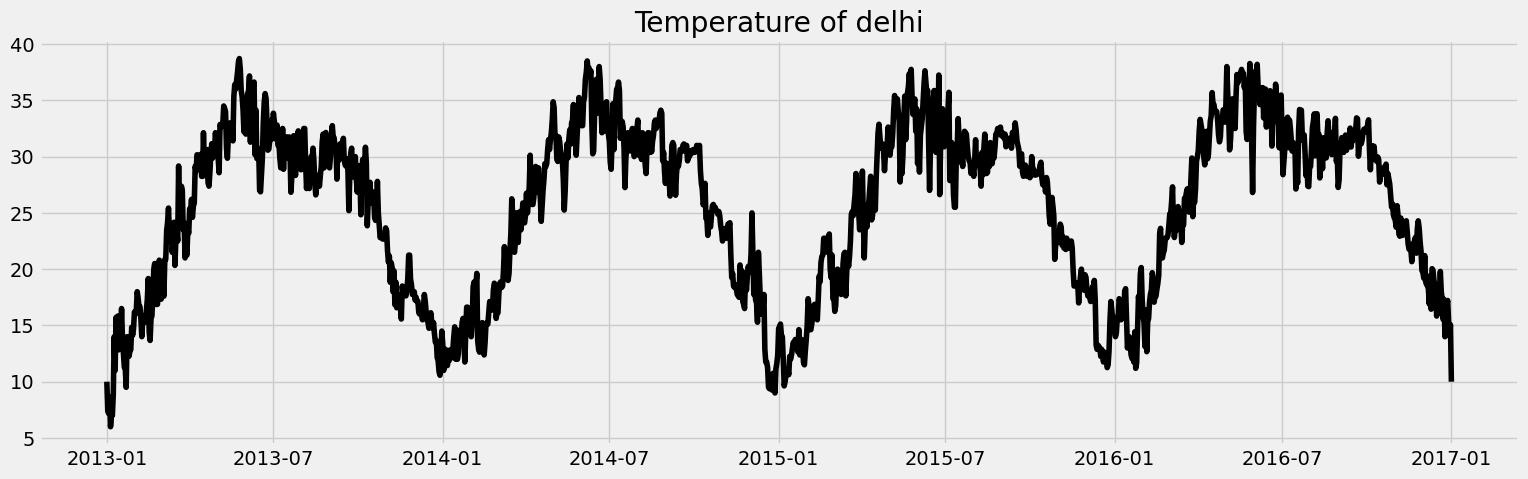

In [3]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['meantemp'],color='black')
plt.title("Temperature of delhi")
plt.show()

# KPSS Test

In [4]:
import warnings
warnings.filterwarnings('ignore')

#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['meantemp'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

KPSS Statistic: 0.18786352260533618
p-value: 0.1
num lags: 25
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Auto Correlation function

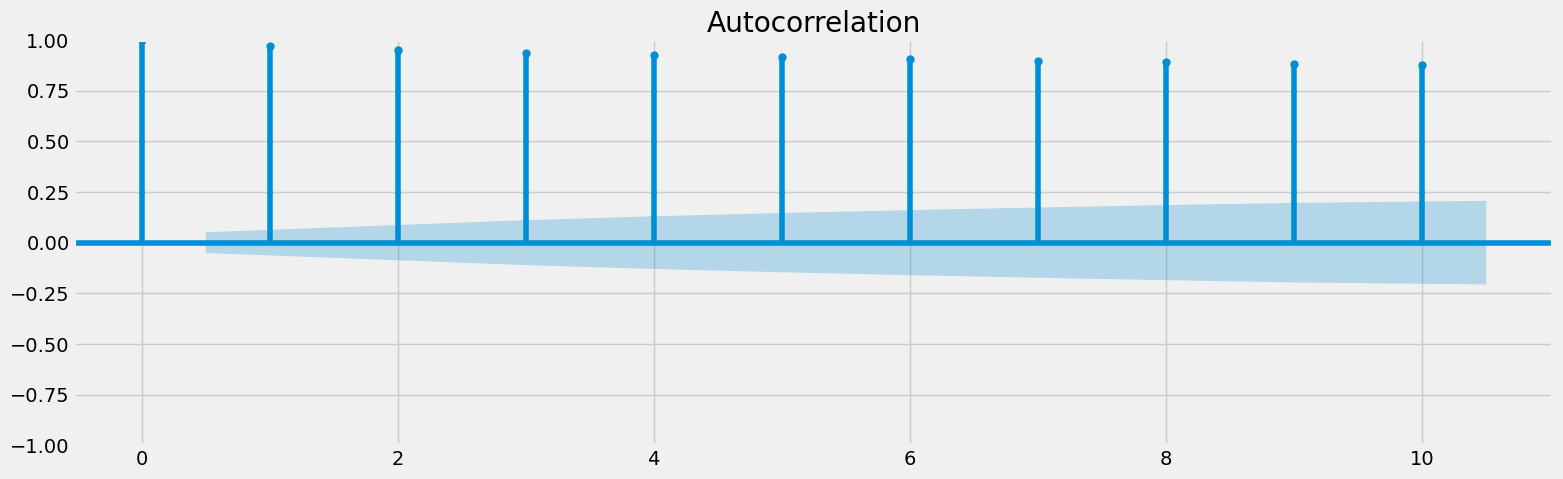

In [5]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['meantemp'], ax=plt.gca(), lags=10)
plt.show()

# Partial Correlation function

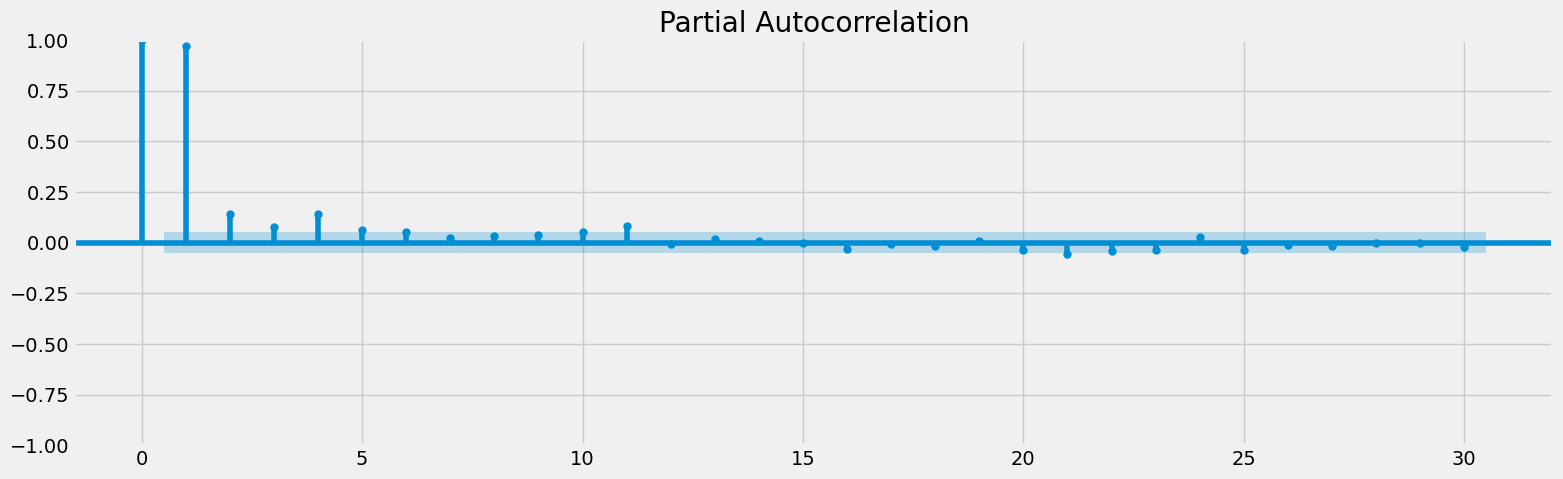

In [6]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['meantemp'], ax=plt.gca(), lags=30)
plt.show()

# Splitting Dataset

In [7]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

# ARIMAX Model

In [8]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['meantemp'], order=(1,0,3), exog= train['humidity'])
model_fit = model.fit()
print(model_fit.params)

const       31.251396
humidity    -0.132914
ar.L1        0.995059
ma.L1       -0.093128
ma.L2       -0.170520
ma.L3       -0.194112
sigma2       1.539887
dtype: float64


In [9]:
y_arimax = data.copy()
y_arimax['arimax_forecast'] = model_fit.predict(test['meantemp'].index.min(), test['meantemp'].index.max(), exog= test['humidity'])

## Plotting Train, Test and Forecasted data

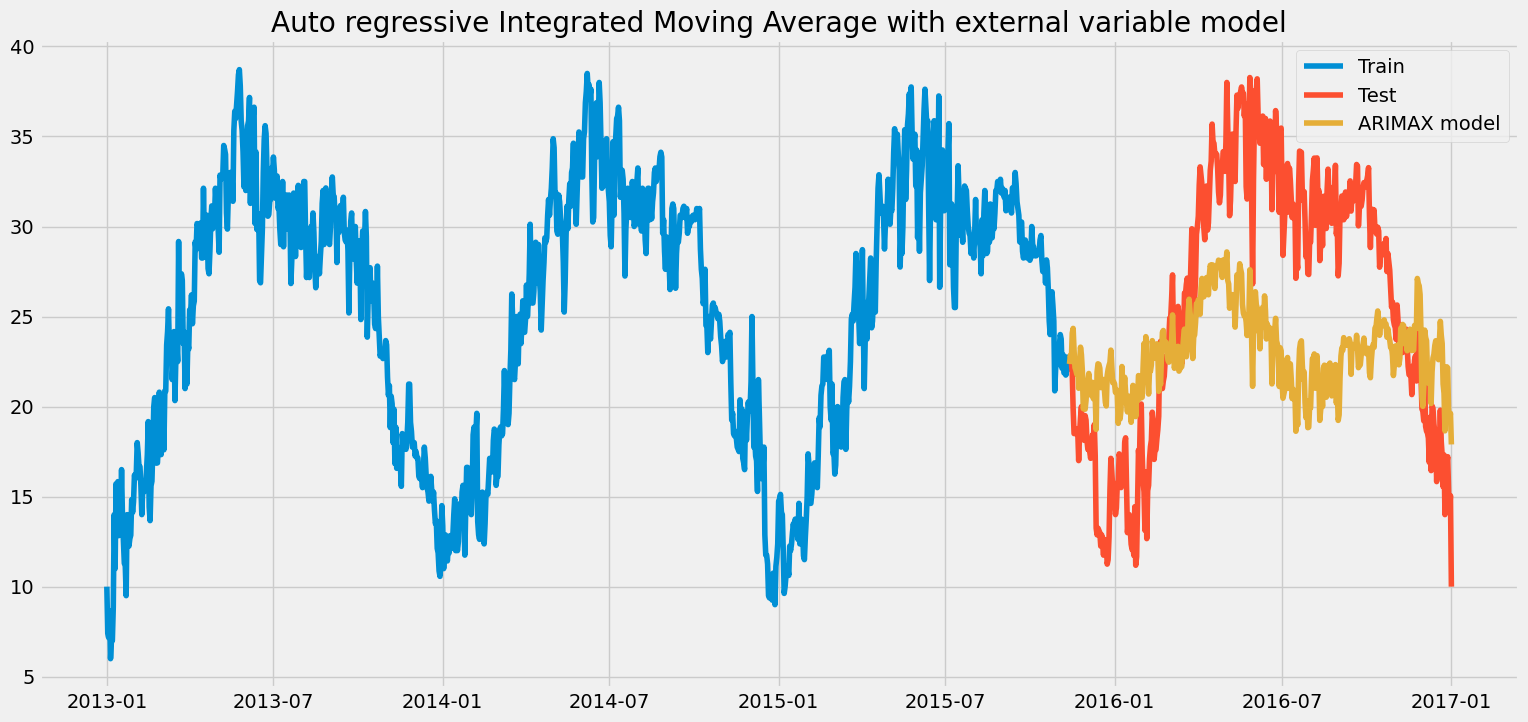

In [10]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_arimax['arimax_forecast'][test['meantemp'].index.min():], label = 'ARIMAX model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average with external variable model')
plt.show()

# Splitting Train and Test data

In [11]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

# SARIMAX Model

In [12]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['meantemp'], order=(7,0,3), seasonal_order=(2,1,1,12), exog =train['humidity'])
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78034D+00    |proj g|=  2.28086D+00


 This problem is unconstrained.



At iterate    5    f=  1.77936D+00    |proj g|=  3.81019D-01

At iterate   10    f=  1.70321D+00    |proj g|=  1.53049D-01

At iterate   15    f=  1.67342D+00    |proj g|=  1.82962D-01

At iterate   20    f=  1.65487D+00    |proj g|=  4.86249D-02

At iterate   25    f=  1.65230D+00    |proj g|=  3.52845D-02

At iterate   30    f=  1.65015D+00    |proj g|=  1.03565D-02

At iterate   35    f=  1.64911D+00    |proj g|=  1.62538D-02

At iterate   40    f=  1.64879D+00    |proj g|=  1.52335D-02

At iterate   45    f=  1.64827D+00    |proj g|=  1.08802D-02

At iterate   50    f=  1.64815D+00    |proj g|=  3.02067D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [13]:
y_sarimax = data.copy()
y_sarimax['sarimax_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                  test['meantemp'].index.max(),
                                                  exog= test['humidity'])

## Plotting Train, Test and Forecasted data

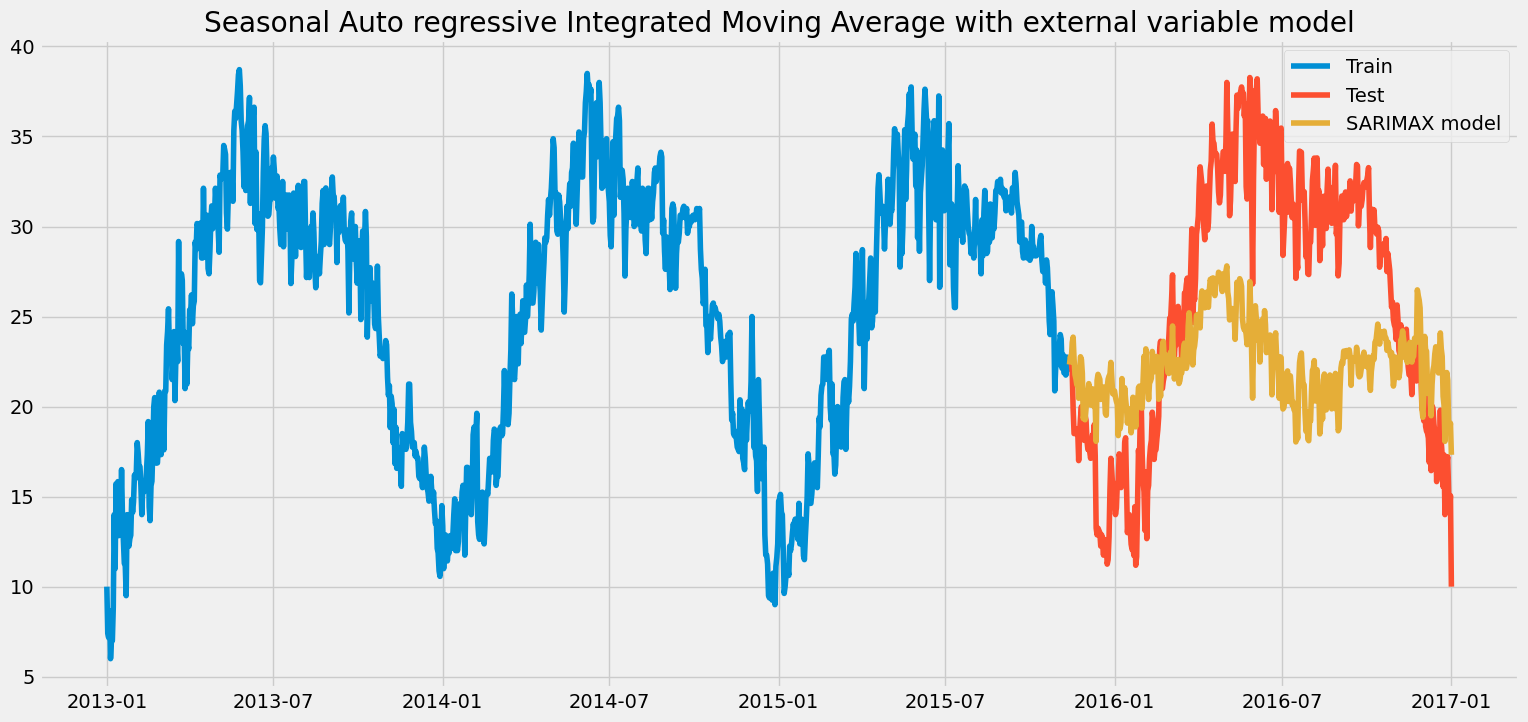

In [14]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_sarimax['sarimax_forecast'][test['meantemp'].index.min():], label = 'SARIMAX model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average with external variable model')
plt.show()